In [1]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

df = pd.read_csv('TELCO_Data.csv')

# What's the Angle?
- We need to advertise and incentivize partner or family plans (those with partners and dependents are less likely to leave).

# Main Points:
- Focus on Family: focus on pushing family/partner plans with special rates or perks

# Key Takeaways from Analysis:
- the monthly churn rate (26.5%) appears to be over 13x the 'normal' churn rate for telecom companies
- the average cost to replace these churned customers *just this month* would be around \\$298. That's \\$556,665.40 for all of them, which would mean almost \\$6.7 Million if future months continue this trend.
- People who churned had higher monthly charges on average than those who did not.
- People with lower tenure are more likely to churn.
- People who have partners are much less likely to churn.
- People with dependents are much less likely to churn. 
- People on autopay are much less likely to churn.

In [2]:
df.to_excel('telco.xlsx')

## Some general data cleanup:

In [3]:
# Changing senior citizen row to boolean values. 

df['is_senior_citizen'] = df['is_senior_citizen'].replace([0, 1],['No', 'Yes']).astype('object')

In [4]:
df['service_type'] = " "

In [5]:
#Filling in column that lists whether customer has phone, internet, or both

for i in range (df.shape[0]):
    if ((df.loc[i, 'phone_service'] != 0) & (df.loc[i, 'internet_service'] != 0)):
        df.loc[i, 'service_type'] = 'Both'
    elif df.loc[i, 'phone_service'] != 0 and df.loc[i, 'internet_service'] == 0:
        df.loc[i, 'service_type'] = 'Phone'
    elif df.loc[i, 'phone_service'] == 0 and df.loc[i, 'internet_service'] != 0:
        df.loc[i, 'service_type'] = 'Internet'

In [6]:
df.service_type.value_counts()

Both        4837
Phone       1529
Internet     683
Name: service_type, dtype: int64

In [7]:
df['is_auto_pay'] = ' '

In [8]:
#Filling in column that lists whether customer is using automatic payment

for i in range(df.shape[0]):
    if 'automatic' in df.loc[i, 'payment_type']:
        df.loc[i, 'is_auto_pay'] = 'Yes'
    elif 'automatic' not in df.loc[i, 'payment_type']:
        df.loc[i, 'is_auto_pay'] = 'No'

In [9]:
#Creating Column to list whether customer has multiple phone lines:

df['has_multiple_lines'] = ' '

In [10]:
#fill in column to list whether customer has multiple phone lines

for i in range(df.shape[0]):
    if df.loc[i, 'phone_service'] > 1:
        df.loc[i, 'has_multiple_lines'] = 'Yes'
    else:
        df.loc[i, 'has_multiple_lines'] = 'No'

In [11]:
#create column that lists whether customer has dependents, a partner, both, or none
df['group_type'] = ' '

In [12]:
for i in range (df.shape[0]):
    if ((df.loc[i, 'partner'] == 'Yes') & (df.loc[i, 'dependents'] == 'Yes')):
        df.loc[i, 'group_type'] = 'Both'
    elif ((df.loc[i, 'partner'] == 'Yes') & (df.loc[i, 'dependents'] == 'No')):
        df.loc[i, 'group_type'] = 'Partner'
    elif ((df.loc[i, 'partner'] == 'No') & (df.loc[i, 'dependents'] == 'Yes')):
        df.loc[i, 'group_type'] = 'Dependents'
    elif ((df.loc[i, 'partner'] == 'No') & (df.loc[i, 'dependents'] == 'No')):
        df.loc[i, 'group_type'] = 'Neither'

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,7039,7040,7041,7042,7043,7044,7045,7046,7047,7048
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
is_senior_citizen,No,No,No,Yes,Yes,No,Yes,No,Yes,No,...,No,Yes,No,No,No,No,No,No,No,No
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
phone_service,1,2,1,1,1,1,1,2,1,2,...,1,1,1,1,1,1,2,1,1,0
internet_service,1,1,2,2,2,1,2,2,1,1,...,0,2,2,2,0,1,2,1,1,1
contract_type,1,0,0,0,0,0,2,2,0,2,...,0,1,1,0,0,1,0,0,2,2
payment_type,Mailed check,Mailed check,Electronic check,Electronic check,Mailed check,Credit card (automatic),Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,...,Mailed check,Bank transfer (automatic),Mailed check,Mailed check,Bank transfer (automatic),Mailed check,Electronic check,Mailed check,Mailed check,Electronic check
monthly_charges,65.6,59.9,73.9,98.0,83.9,69.4,109.7,84.65,48.2,90.45,...,18.9,84.95,94.05,70.15,20.95,55.15,85.1,50.3,67.85,59.0


# Important Numbers

In [14]:
#Number of customers in dataset
customer_count = df.shape[0]

customer_count

7049

In [15]:
#Number of churned customers
churned_count = df[df.churn == 'Yes'].shape[0]

churned_count

1870

In [16]:
#Number of churned customers that only had dependents
dependents_churn = df[(df['churn'] == 'Yes') & (df['group_type'] == 'Dependents')].shape[0]

dependents_churn

77

In [17]:
#Number of churned customers that only had partners
partner_churn = df[(df['churn'] == 'Yes') & (df['group_type'] == 'Partner')].shape[0]

partner_churn

420

In [18]:
#Number of churned customers that had both partners and dependents
partner_and_dependents_churn = df[(df['churn'] == 'Yes') & (df['group_type'] == 'Both')].shape[0]

partner_and_dependents_churn

250

In [19]:
#Number of churned customers that had neither a partner or dependents
solo_churn = df[(df['churn'] == 'Yes') & (df['group_type'] == 'Neither')].shape[0]

solo_churn

1123

In [20]:
dependents_churn + partner_churn + partner_and_dependents_churn + solo_churn

1870

In [21]:
# Number of churned customers with multiple lines
multiple_line_churn = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes')].shape[0]

multiple_line_churn

850

In [22]:
(churned_count / customer_count) * 100

26.528585614980848

In [23]:
multiple_line_dependents_churn = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes') & (df['group_type'] == 'Dependents')].shape[0]

multiple_line_dependents_churn

22

In [24]:
multiple_line_partner_churn = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes') & (df['group_type'] == 'Partner')].shape[0]

multiple_line_partner_churn

256

In [25]:
multiple_line_both_churn = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes') & (df['group_type'] == 'Both')].shape[0]

multiple_line_both_churn

112

In [26]:
multiple_line_solo_churn = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes') & (df['group_type'] == 'Neither')].shape[0]

multiple_line_solo_churn

460

In [27]:
multiple_line_both_churn + multiple_line_dependents_churn + multiple_line_partner_churn

390

In [28]:
(multiple_line_solo_churn / multiple_line_churn) * 100

54.11764705882353

In [29]:
#customers saved assuming 50% plan efficacy

multiple_line_churn * .5

425.0

In [48]:
#Calculating lost revenue from churned multi-line customers:

multi_lost = df[(df['churn'] == 'Yes') & (df['has_multiple_lines'] == 'Yes')].monthly_charges.sum()

In [51]:
#Calculating yearly lost revenue from churned multi-line customers:

multi_lost_yearly = multi_lost * 12

In [52]:
#Calculating yearly revenue saved if plan 50% successful:
multi_lost_yearly * .5

454263.0

## Step 1: Define your goal. What's the impact? Who benefits? Why does this matter?

- What is our goal?
    - Understand the drivers of customer churn. 
    
- Why does customer churn matter?
    - In the simplest of terms, customer churn means lost revenue.
    - Keeping customers is much cheaper than trying to obtain new ones. 
    - https://www.zendesk.com/blog/customer-churn-rate/
    - https://www.netsuite.com/portal/resource/articles/human-resources/customer-churn-analysis.shtml?mc24943=v2
    
- What's our target variable?
    - Customer churn is the target variable. We have a yes/no for whether someone left. 
    
- What are some interesting variables?
    - churn (this is a monthly value)
    - monthly_charges
    - tenure
    - contract_type
    - dependents
    - partner
    - I want to create another variable that determines whether someone has both phone *and* internet.
    
- What does an MVP look like?
    - What target rate are we trying to hit with churn?
        - A 'normal' churn rate in telecommunications is 1.9% - 2.1%
        - http://www.dbmarketing.com/telecom/churnreduction.html
    - What's the biggest story or two?
        - The cost of replacing customers (maybe illustrate how much moving the needle even something like 5 or 10 percent can help)
    - Defining a deliverable:
        - Need to create a short, 3 minute presentation of analysis and recommendations. 
        
- Data Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

<AxesSubplot:>

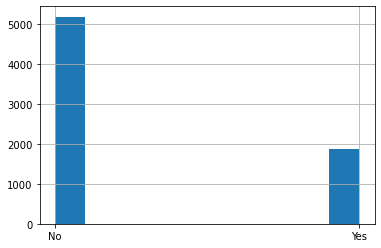

In [30]:
#The target variable is churn, so I want to know the percentage of churn in the last month:

df.churn.hist()

In [31]:
#It looks like churn is pretty high, but I want to see the numbers:

df.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

In [32]:
#Percentage of customers that churn:
(df[df.churn == 'Yes'].shape[0] / df.shape[0]) * 100

#It looks like the monthly churn rate is about 26.5%, which is alarmingly high.

26.528585614980848

In [33]:
# How does this compare to the 1.9 - 2.1% that is considered 'normal'? We'll assume a 2% churn as normal:
((df[df.churn == 'Yes'].shape[0] / df.shape[0]) * 100) / 2

# So our churn is over 13x the conventional average. 

13.264292807490424

In [34]:
#How much money is lost (monthly) when these customers leave?

df[df.churn == 'Yes'].monthly_charges.sum()

139161.35

In [35]:
#How much money would this be over the course of the year, assuming we lost no further customers?
df[df.churn == 'Yes'].monthly_charges.sum() * 12

#So the lost revenue over the course of a year from these customers alone is almost $1.7M.

1669936.2000000002

# How much does it cost on average to obtain a new telecom customer?
- "The average costs of acquisition are about four times average monthly ARPU," so we'll assume that 4 months' revenue will be the cost of replacing a churned user. 
- https://stlpartners.com/research/telco-economics-mobile-churn-rates-and-reduction-strategies/

In [36]:
# Given the above, how much would it cost us to replace these users?

(df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4

#The average cost to replace a user lost to churn is about $298. 

297.67133689839574

In [37]:
# How much would this be, total, for all customers lost this month?
((df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4) * (df[df.churn == 'Yes'].shape[0])

# The cost to replace the customers lost this month would be around $556,000.

556645.4

In [38]:
# Assuming a fiscal year that consists of months like this, what's the yearly cost of replacing churned users?
(((df[df.churn == 'Yes'].monthly_charges.sum() / df[df.churn == 'Yes'].shape[0]) * 4) * (df[df.churn == 'Yes'].shape[0]) *12)

#The cost of customer acquisition *just to replace churned customers* would be almost $6.7 million.

6679744.800000001

# What are the big drivers of customer churn?
- Key hypotheses to test:
    - There is a relationship between churn and monthly charges
    - People with longer tenure will be less likely to leave
    - Is there a relationship between whether a customer has a partner or dependents and whether they churn?

<AxesSubplot:xlabel='churn', ylabel='monthly_charges'>

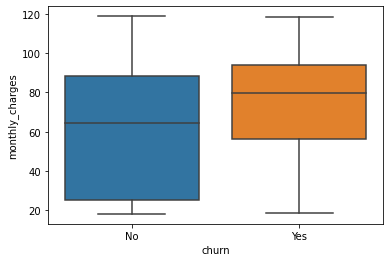

In [39]:
#It appears that those who churned have higher average monthly charges.

sns.boxplot(x = "churn", y = "monthly_charges", data = df)

<AxesSubplot:xlabel='churn', ylabel='tenure'>

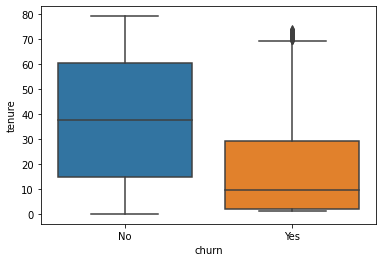

In [40]:
sns.boxplot(x = 'churn', y = 'tenure', data = df)

#It does indeed appear that people with lower tenure are more likely to churn

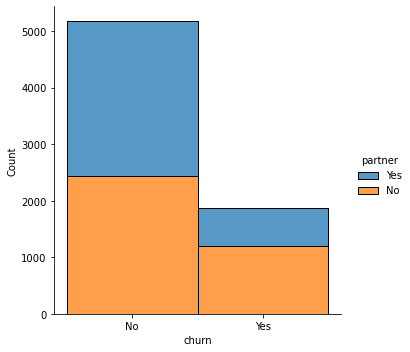

In [41]:
sns.displot(data = df, x = 'churn', hue = 'partner', multiple = 'stack')

#It appears that people who churn are less likely to have partners.

#We could maybe advertise an incentive on shared or family plans. 

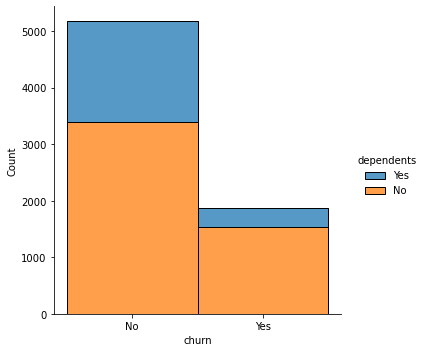

In [42]:
sns.displot(data = df, x = 'churn', hue = 'dependents', multiple = 'stack')

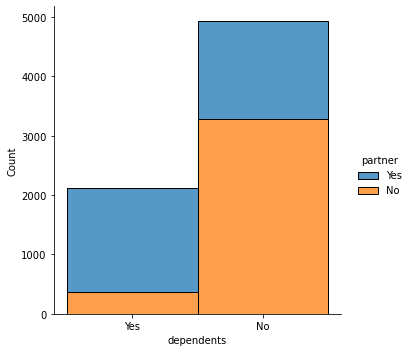

In [43]:
sns.displot(data = df, x = 'dependents', hue = 'partner', multiple = 'stack')

#It looks like people with dependents are much less likely to churn. 

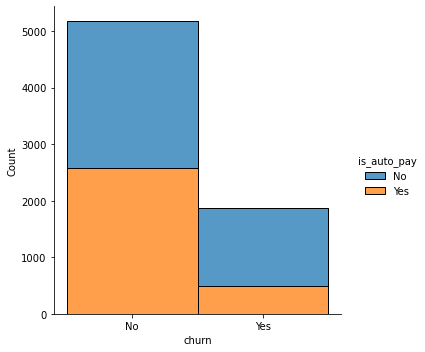

In [44]:
sns.displot(data = df, x = 'churn', hue = 'is_auto_pay', multiple = 'stack')

#It looks like those who churn are MUCH less likely to be signed up for autopay. 

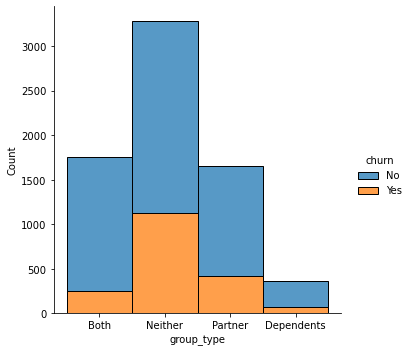

In [45]:
sns.displot(data = df, x = 'group_type', hue = 'churn', multiple = 'stack')

<AxesSubplot:xlabel='churn', ylabel='tenure'>

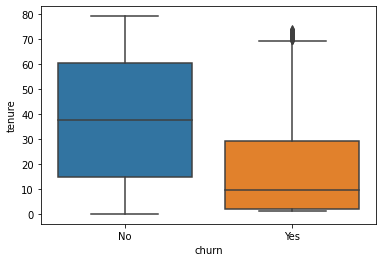

In [46]:
sns.boxplot(x = 'churn', y = 'tenure', data = df)